In [2]:
import numpy
x = 2 * numpy.random.rand(100, 1) # 100 x 1 matrix
y = 4 + 3 * x + numpy.random.randn(100, 1)

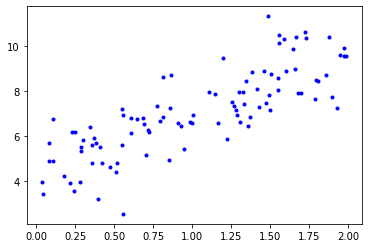

In [3]:
import matplotlib.pyplot as plt

plt.plot(x, y, "b.")
plt.show()

In [4]:
# 100x1 matrix of 1 with 100x1 matrix of x
# (since theta 0 is 1)
x_b = numpy.c_[numpy.ones((100, 1)), x]
# np.linalg -  linear algebra module to use inverse
# dot for matrix multiplication
theta_best = numpy.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)

In [5]:
# linear regression result using Normal Equation
# dervied & solved from MSE
# theta 0 & theta 1
theta_best

array([[4.36961491],
       [2.64769384]])

In [6]:
# guess when x = 0 & x = 2
x_new = numpy.array([[0], [2]])
x_new_b = numpy.c_[numpy.ones((2,1)), x_new] # [[1, 0], [1, 2]]
y_predict = x_new_b.dot(theta_best)
y_predict

array([[4.36961491],
       [9.66500259]])

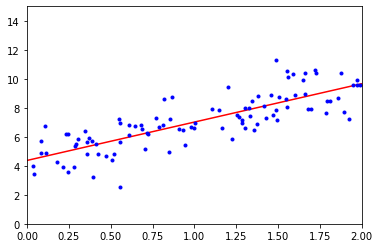

In [7]:
plt.plot(x_new, y_predict, "r-") # red line
plt.plot(x, y, "b.") # black dot
plt.axis([0, 2, 0, 15])
plt.show()

In [8]:
# linear reg using sklearn
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x, y)
print(lin_reg.intercept_, lin_reg.coef_)
lin_reg.predict(x_new)

[4.36961491] [[2.64769384]]


array([[4.36961491],
       [9.66500259]])

In [9]:
# linearRegression is based lstsq (least squares)
theta_best_svd, residuals, rank, s = numpy.linalg.lstsq(x_b, y, rcond=1e-6)
theta_best_svd

array([[4.36961491],
       [2.64769384]])

In [10]:
# Can use pinv (pseudoinverse of X) to calculate directly
numpy.linalg.pinv(x_b).dot(y)

# uses standard matrix factorization technique called SVD (singular value decomp)
# LinearRegression -> n^2 using SVD

array([[4.36961491],
       [2.64769384]])

In [11]:
# batch gradient descent algorithm
eta = 0.1 # learning rate
n_iterations = 1000
m = 100

theta = numpy.random.randn(2, 1) # 2x1
for iteration in range(n_iterations):
    gradients = 2/m * x_b.T.dot(x_b.dot(theta) - y)
    theta = theta - eta * gradients

In [12]:
theta

array([[4.36961491],
       [2.64769384]])

In [13]:
# stoichastic gradient descent
# epoch  named by convention: # of rounds
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t+t1)

theta = numpy.random.randn(2,1) # random initialization

#NOTE: x is 2x1 matrix : [1, xi] - for y = theta(0) + theta(1) x(1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = numpy.random.randint(m)
        xi = x_b[random_index: random_index+1]
        yi = y[random_index: random_index+1]
        # same as prev eq, but 1/m is in eta variable
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m * i)
        theta = theta - eta * gradients

In [14]:
theta

array([[4.57181845],
       [2.262144  ]])

In [15]:
# Use Stoichastic GD SDGRegressor
# 1000 epochs or until loss drops by less than 0.001 in an epoch
# eta0 : starting learning rate
# no regularization (penalty=None)
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(x, y.ravel())

sgd_reg.intercept_, sgd_reg.coef_

(array([4.34437149]), array([2.65694674]))

In [16]:
# Polynomial Regression

# generate random variables
m = 100
x = 6 * numpy.random.rand(m, 1) - 3
y = 0.5 * x**2 + x + 2 + numpy.random.randn(m, 1)

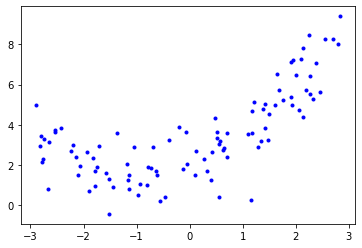

In [17]:
plt.plot(x, y, "b.") # black dot
plt.show()

In [18]:
# Use PolynomialFeatures to transform training data
# adds square (2nd deg pol) to each feature
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
x_poly = poly_features.fit_transform(x)
print(x[0])
print(x_poly[0])

[1.46957626]
[1.46957626 2.1596544 ]


In [19]:
lin_reg = LinearRegression()
lin_reg.fit(x_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.0488189]), array([[0.93733123, 0.48123688]]))

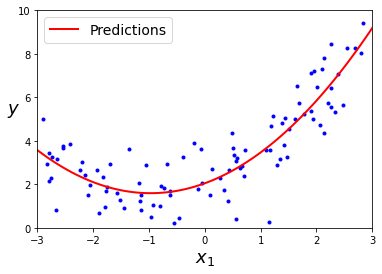

In [20]:

X_new=numpy.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(x, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

In [34]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, x, y):
    # split training set, 20%
    x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(x_train)):
        model.fit(x_train[:m], y_train[:m])
        y_train_predict = model.predict(x_train[:m])
        y_val_predict = model.predict(x_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(numpy.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(numpy.sqrt(val_errors), "b-", linewidth=3, label="val")

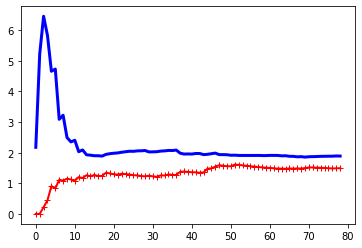

In [38]:
# plot training data & validation data comparison to actual value
# linear regression can't fit actual data; underfit
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, x, y)

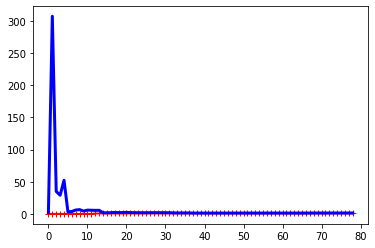

In [41]:
from sklearn.pipeline import Pipeline
#pipline: data transformations
# 10th degree polynomial. PolynomialFeatures adds scombinations of features
# doesn't predict itself.
# model much better on training data than validation data: overfit

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression())
])
plot_learning_curves(polynomial_regression, x, y)

In [44]:
# Ridge Regression with closed-form equation/ solution
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(x, y)
ridge_reg.predict([[1.5]])


array([[4.72105523]])

In [47]:
# Stoichastic Gradient Descent for ridge regressio
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(x, y.ravel())
sgd_reg.predict([[1.5]])
# print(y.ravel())

# l2: cost function = 1/2 of square of l2 normal, which is ridge regression

array([4.69403257])

In [49]:
#Lasso regression, presumably using subgradient vector equation
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(x, y)
lasso_reg.predict([[1.5]])

# SGDRegressor(penalty="l1") also works

array([4.67390122])

In [50]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(x, y)
elastic_net.predict([[1.5]])

array([4.67841344])

In [57]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
    ('std_scaler', StandardScaler())
])
x_train, x_val, y_train, y_val = train_test_split(x, y.ravel(), test_size=0.2)
x_train_poly_scaled = poly_scaler.fit_transform(x_train)
x_val_poly_scaled = poly_scaler.transform(x_val)
# stoich gradient descent
sgd_reg = SGDRegressor(max_iter=1, tol=-numpy.infty, warm_start=True, penalty=None, learning_rate="constant", eta0=0.0005)
minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(x_train_poly_scaled, y_train)
    y_val_predict = sgd_reg.predict(x_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)